In [167]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [169]:
import ast
df=pd.read_csv("../averages_enrol.csv",converters={"ccode":ast.literal_eval})#,dtype={"ccode":list})
df[["term"]]=pd.Categorical(df.term)
df[["section"]]=pd.Categorical(df.section)
df

,term,ccode,section,instructor,org,expl_lvl,q_treat,visual,oral,help,...,attend,assign,notes,textbook,new_mat,assign_amt,outside,num_resp,enrolled,resp_rate
0,1131,[ACTSC 231],1,Anne Mackay,1.600000,2.873239,1.536232,1.591549,1.676056,1.526316,...,1.225352,1.588235,1.358209,2.036364,2.782609,2.901639,2.279412,71,184,0.385870
1,1131,[ACTSC 231],51,Carole Bernard,1.727273,2.909091,2.090909,1.700000,2.000000,1.444444,...,1.000000,1.300000,1.625000,1.333333,2.545455,2.818182,2.000000,11,18,0.611111
2,1131,[ACTSC 232],1,James Adcock,1.360825,2.804124,1.453608,1.567010,1.268041,2.000000,...,1.154639,1.604167,1.516129,1.865169,2.659794,2.927835,2.000000,97,143,0.678322
3,1131,[ACTSC 331],1,Rocky Cui,1.851064,2.744681,2.043478,1.978723,2.108696,1.515152,...,1.297872,1.500000,1.586207,1.878049,2.659574,2.755556,2.021277,47,95,0.494737
4,1131,[ACTSC 371],1,Brent Matheson,2.221053,2.821053,2.000000,2.452632,2.242105,2.565217,...,1.329787,1.741935,1.909091,2.271429,2.851064,3.021277,1.903226,95,236,0.402542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,1185,"[STAT 430, STAT 830]",1,Fernando Camacho,3.081081,2.937500,2.441176,3.351351,3.055556,2.400000,...,1.472222,2.108108,2.000000,1.666667,2.363636,3.171429,2.270270,37,105,0.352381
3785,1185,[STAT 431],1,Leilei Zeng,2.135135,2.729730,2.000000,1.945946,2.162162,1.733333,...,1.216216,1.638889,1.821429,1.950000,2.888889,2.756757,2.540541,37,117,0.316239
3786,1185,"[CM 761, STAT 440, STAT 840]",1,Ryan Browne,2.200000,2.933333,2.066667,2.357143,2.266667,1.500000,...,1.533333,1.600000,1.636364,1.000000,2.733333,2.666667,3.066667,15,40,0.375000
3787,1185,[STAT 443],1,Hamy Fahmy,3.088235,3.000000,3.090909,3.323529,2.941176,3.076923,...,1.794118,1.941176,2.055556,2.000000,2.424242,2.558824,2.647059,34,128,0.265625


In [170]:
df.columns

Index(['term', 'ccode', 'section', 'instructor', 'org', 'expl_lvl', 'q_treat',
       'visual', 'oral', 'help', 'interest', 'overall', 'attend', 'assign',
       'notes', 'textbook', 'new_mat', 'assign_amt', 'outside', 'num_resp',
       'enrolled', 'resp_rate'],
      dtype='object')

In [156]:
df.ccode.explode().apply(lambda x:x.split(" ",1)[0]).unique()

array(['ACTSC', 'AMATH', 'CS', 'PMATH', 'PHYS', 'CO', 'QIC', 'COMM',
       'ECE', 'CM', 'MATBUS', 'MATH', 'MTHEL', 'STAT', 'SYDE', 'EARTH',
       'SE', 'BIOL', 'ACC', 'ENGL'], dtype=object)

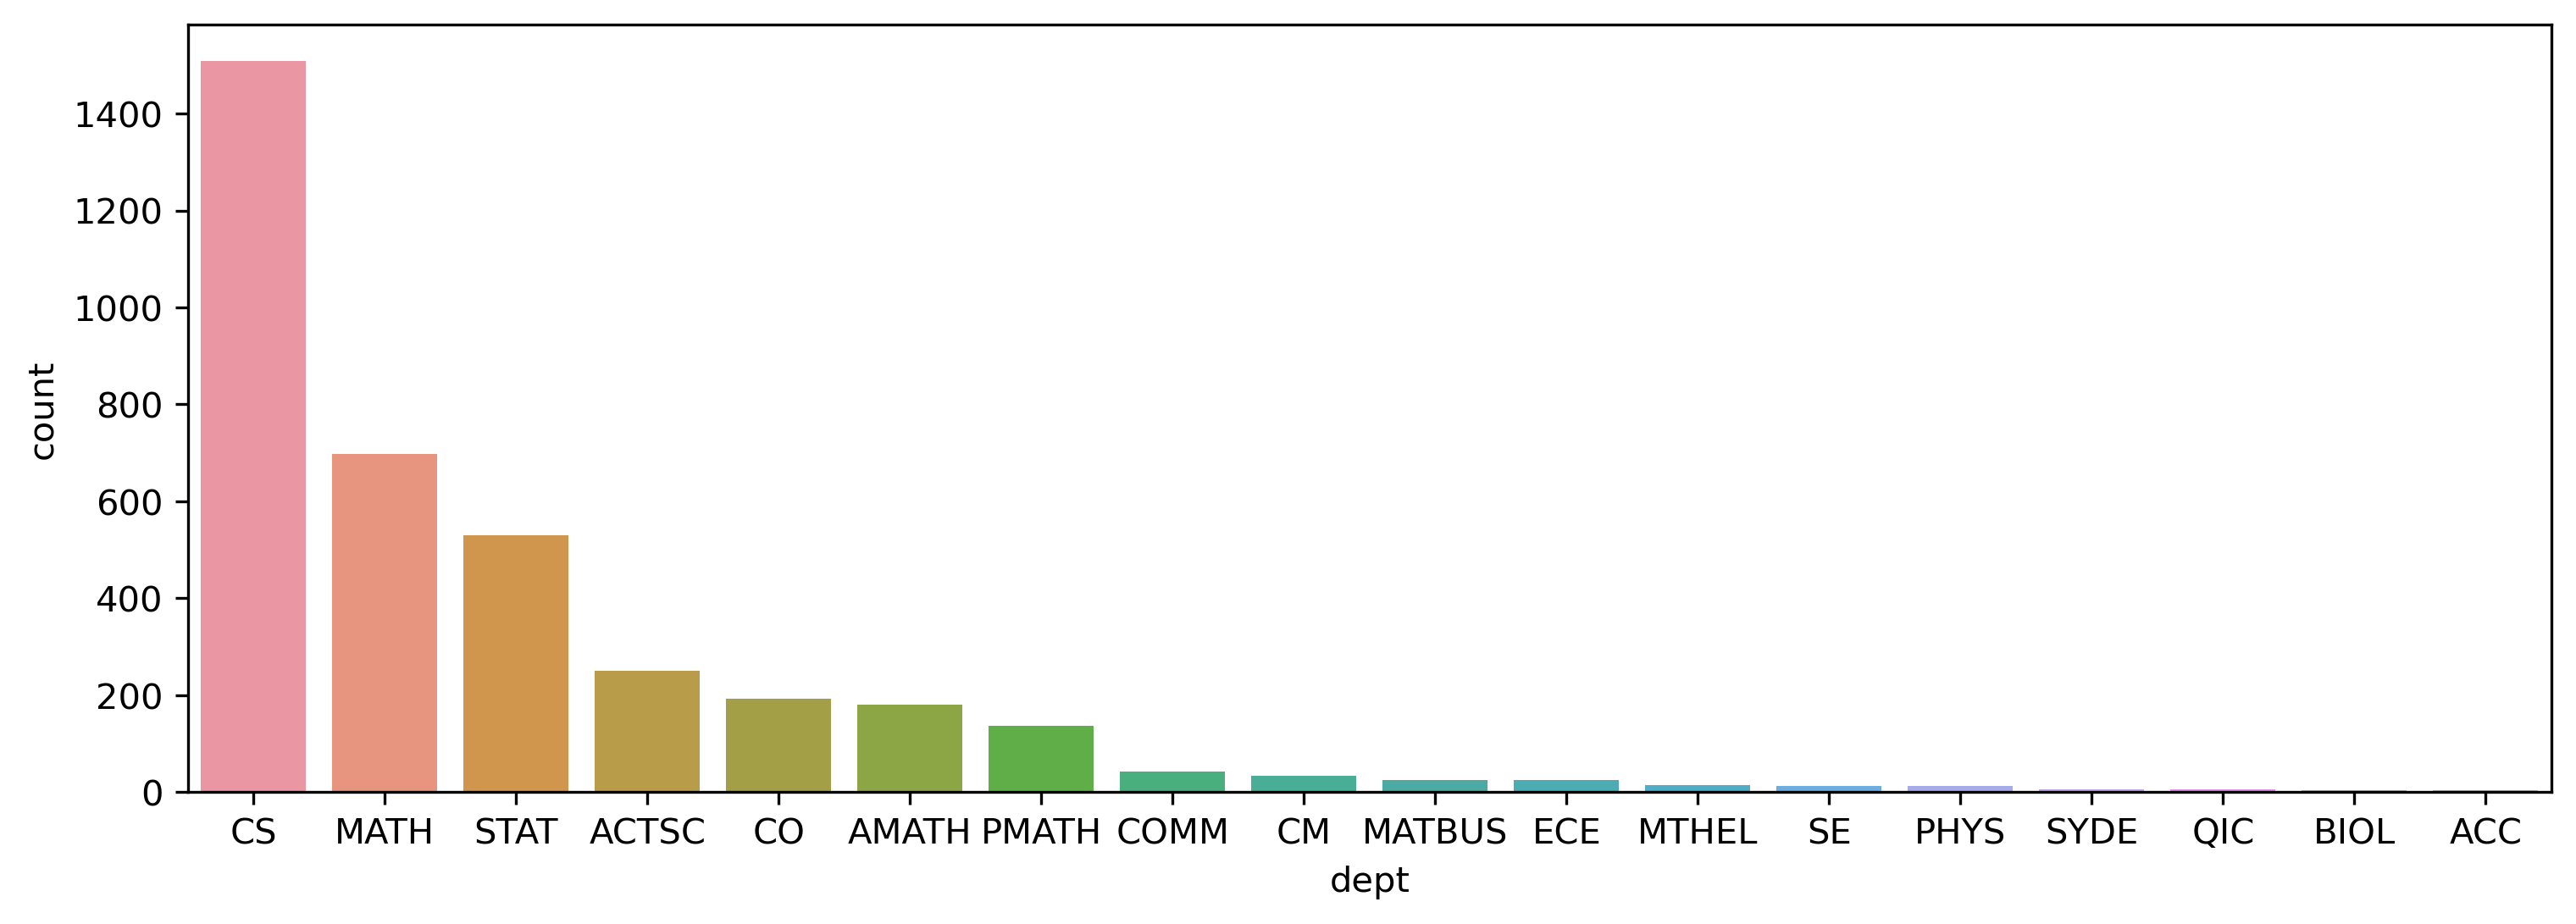

In [195]:
_=pd.DataFrame(data=df.ccode.explode().apply(lambda x:x.split(" ",1)[0]),columns=["ccode"])
_.columns=["dept"]
plt.figure(figsize=(12, 4))
sns.countplot(x="dept",order=_.dept.value_counts().index,
              data=_)#df[["ccode"]].explode("ccode")[:3])
# plt.savefig("../img/dept_count.svg")

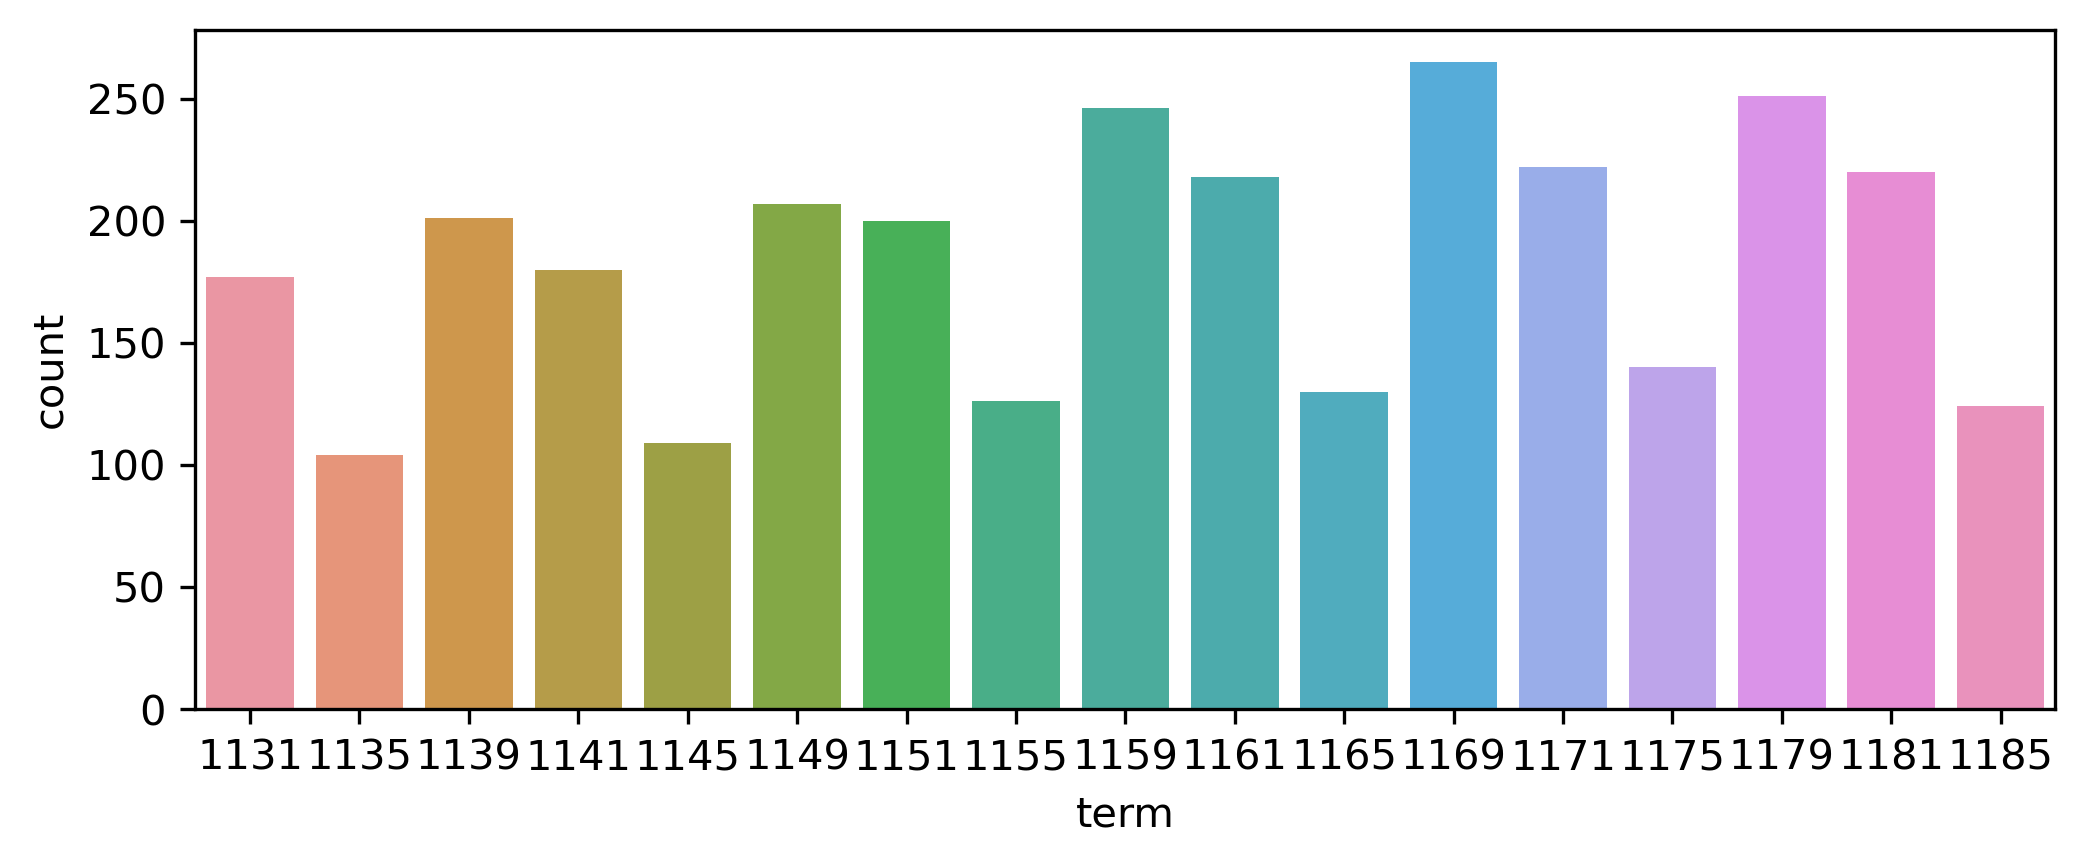

In [160]:
# df1.plot.bar(x="term") # verify
plt.figure(figsize=(8, 3))
sns.countplot(x="term", data=df1)#hue=df1.term)#df1.term.apply(lambda x:(x%10)//4))
# plt.savefig("../img/term_count.svg")

In [211]:
sal=pd.concat([pd.read_csv(f"../salaries/p_{yr}.csv") for yr in range(2018,2010,-1)])
sal=sal.groupby("name").first()
salm=sal[sal.index.isin(df.instructor.unique())]
sal.head(50)

,title,salary,benefits
name,,,
A. Tupling,Professor,180567.92,519.72
A.Russell Tupling,Professor,166933.16,578.96
Abigail Scholer,Associate Professor,132597.73,373.00
Achim Kempf,Professor,187834.44,395.88
Ada Barlatt,Assistant Professor,102159.48,359.08
Ada Hurst,Lecturer,128921.00,380.48
Adam Kolkiewicz,Associate Professor,175958.20,519.36
Adam Neale,Lecturer,102058.60,169.28
Adam Tsen,Assistant Professor,128595.20,147.44


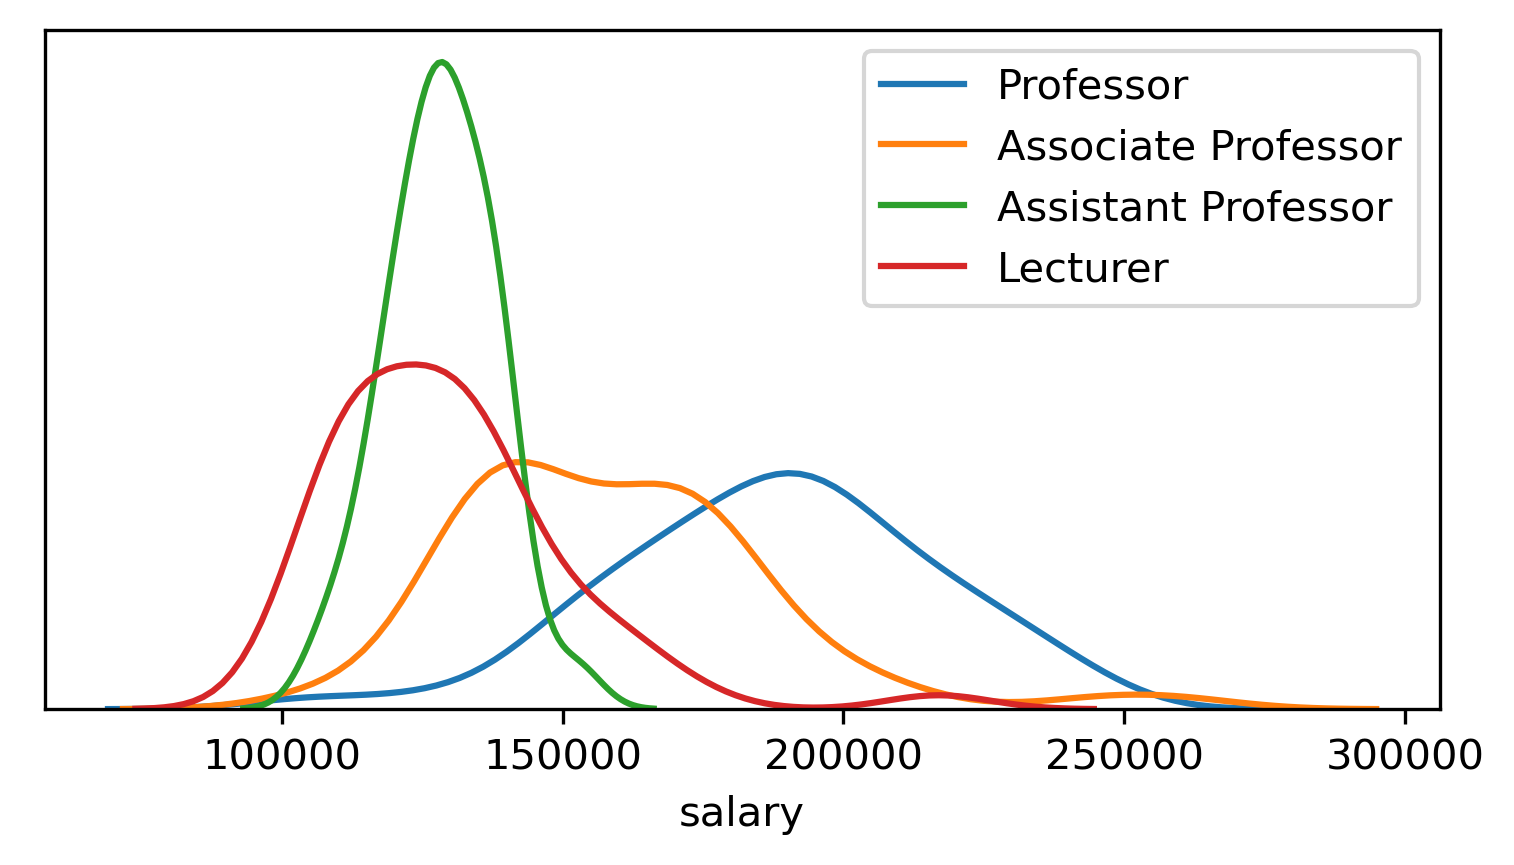

In [222]:
plt.figure(figsize=(6, 3))
for tit in ["Professor","Associate Professor","Assistant Professor","Lecturer"]:
    sns.kdeplot(salm[salm.title==tit].salary,label=tit)
plt.legend()
plt.xlabel('salary')
# plt.ylabel('density')
plt.gca().axes.get_yaxis().set_visible(False)

# # plt.subplot(1, 2, 2)
# plt.tight_layout()
# plt.savefig("../img/sal_dist.svg")

Text(0.5, 1.0, 'Salary distribution by title')

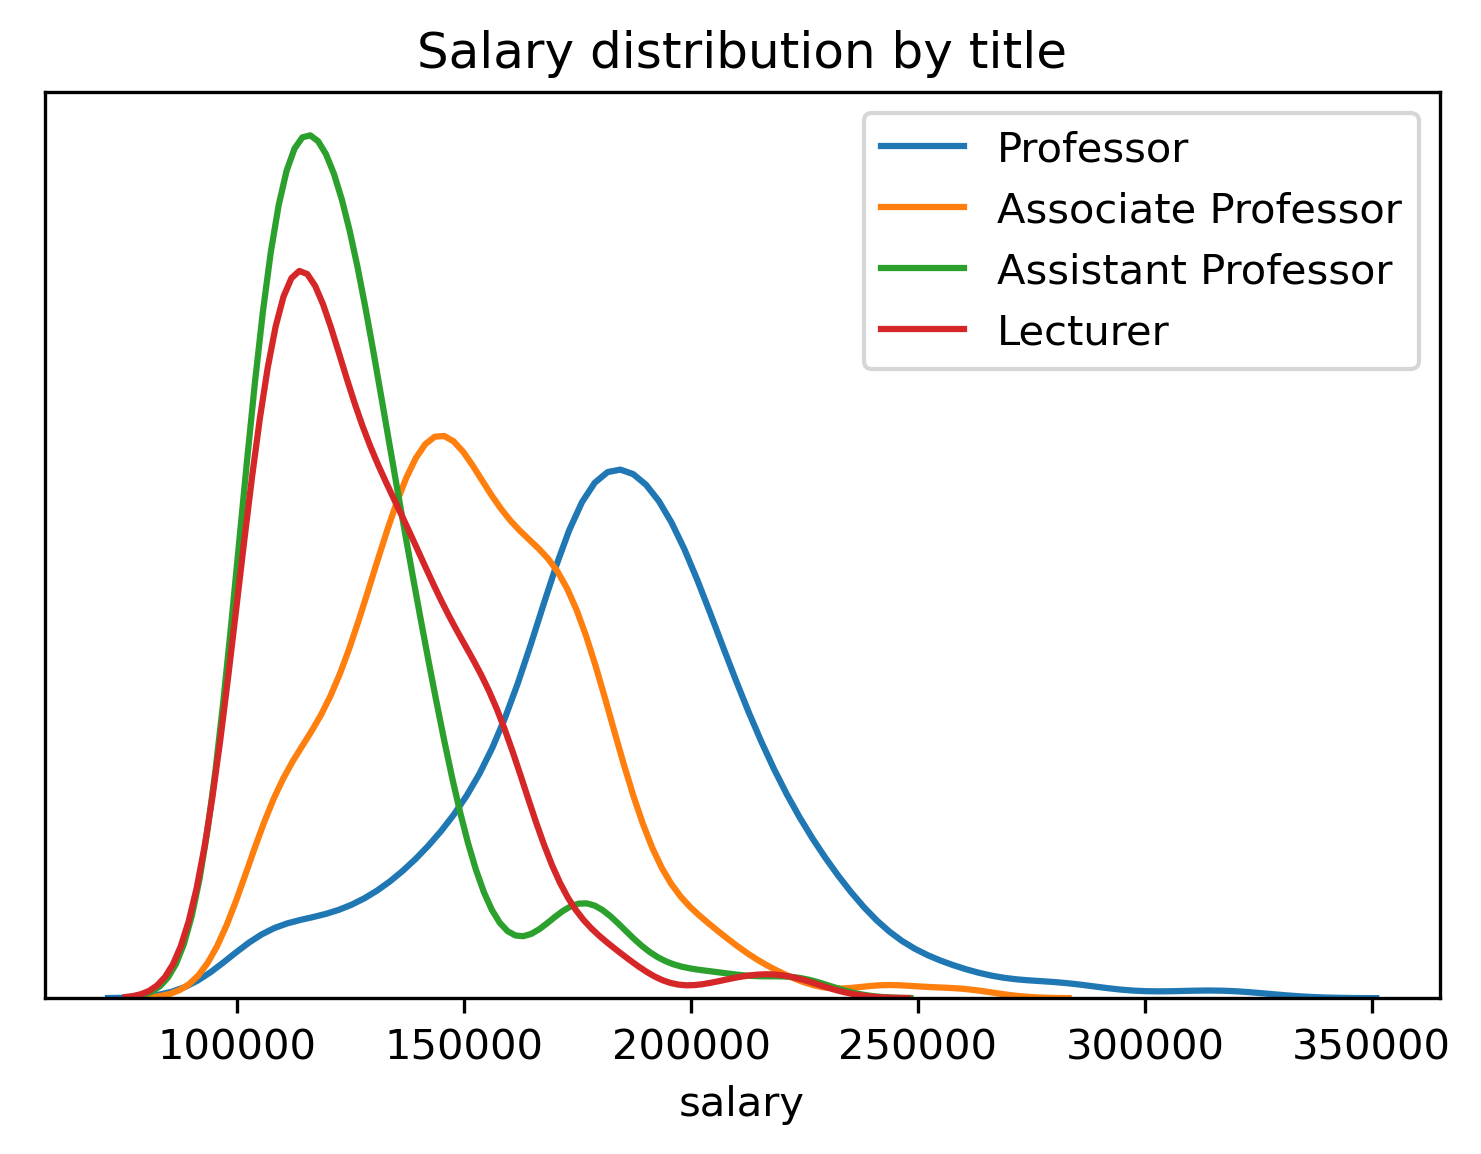

In [178]:
# plt.figure(figsize=(6, 3))
# plt.subplot(1, 2, 1)
for tit in ["Professor","Associate Professor","Assistant Professor","Lecturer"]:
    sns.kdeplot(sal[sal.title==tit].salary,label=tit)
plt.legend()
plt.xlabel('salary')
# plt.ylabel('density')

plt.gca().axes.get_yaxis().set_visible(False)
plt.title("Salary distribution by title")

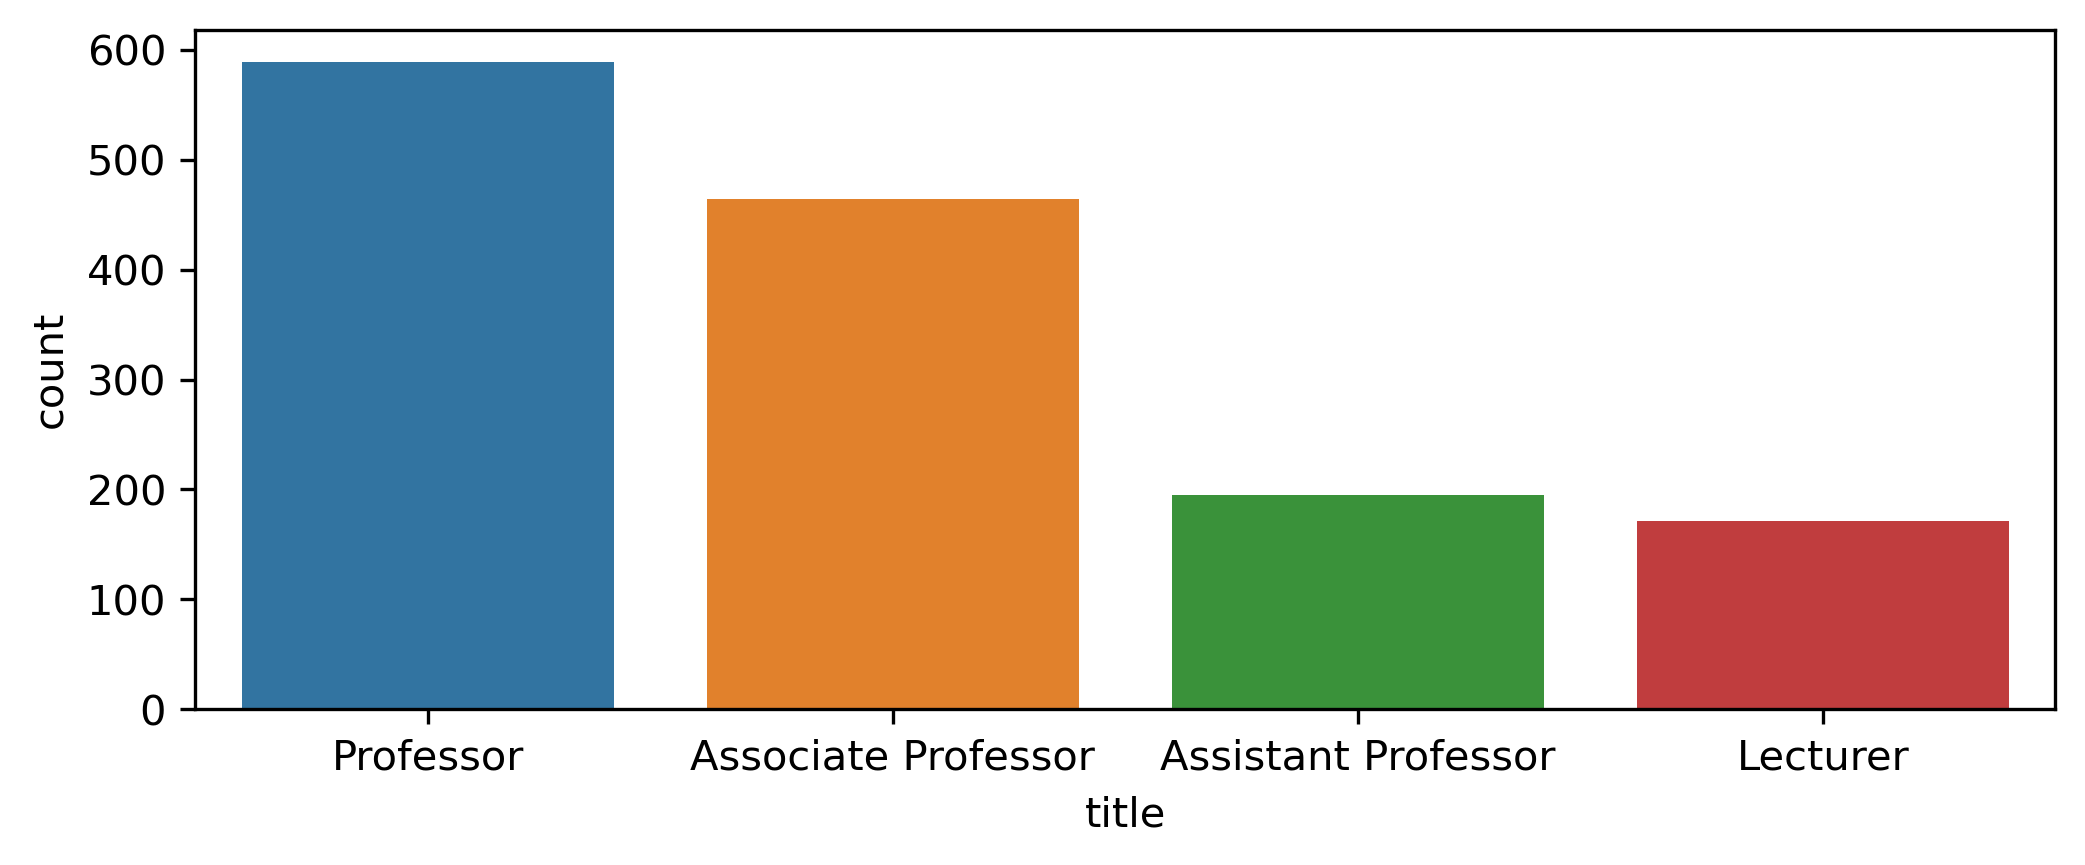

In [171]:
plt.figure(figsize=(8, 3))
sns.countplot(x="title", data=sal)#hue=df1.term)#df1.term.apply(lambda x:(x%10)//4))

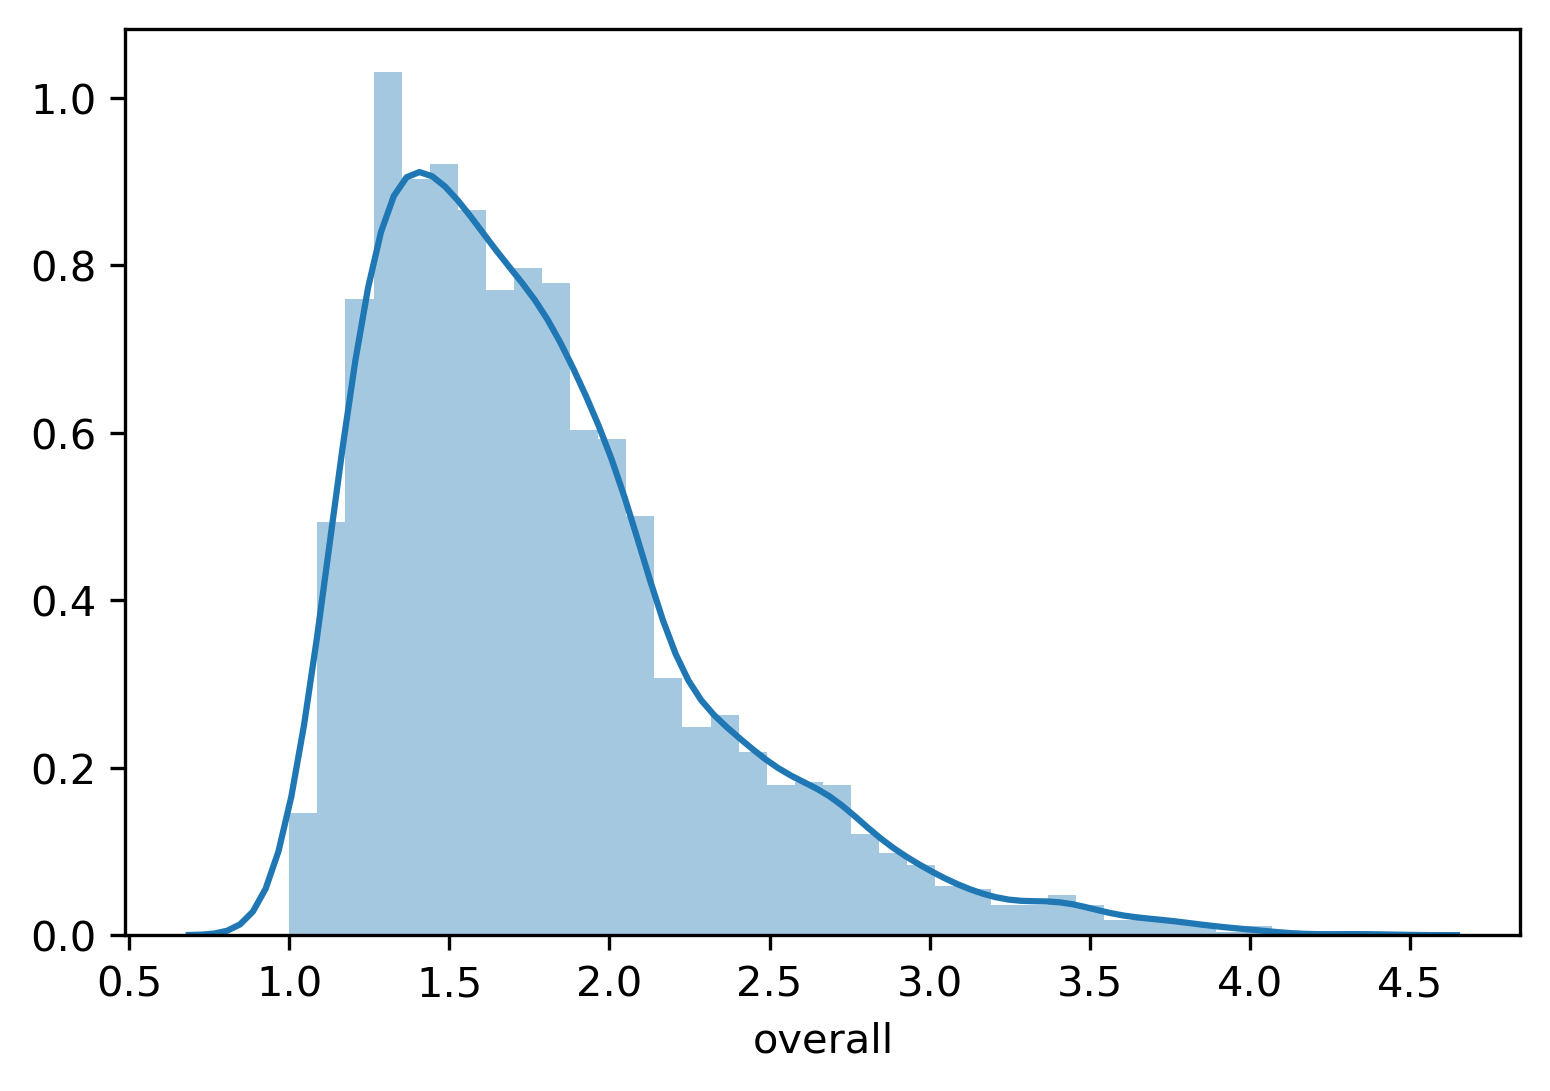

In [194]:
sns.distplot(df1.overall)

In [180]:
print(df.describe().to_latex(float_format="{:0.2f}".format))

\begin{tabular}{lrrrrrrrrrrrrrrrrrrr}
\toprule
{} &     org &  expl\_lvl &  q\_treat &  visual &    oral &    help &  interest &  overall &  attend &  assign &   notes &  textbook &  new\_mat &  assign\_amt &  outside &  num\_resp &  enrolled &  resp\_rate &    salary \\
\midrule
count & 3120.00 &   3120.00 &  3120.00 & 3120.00 & 3120.00 & 3120.00 &   3120.00 &  3120.00 & 3120.00 & 3120.00 & 3120.00 &   3120.00 &  3120.00 &     3120.00 &  3120.00 &   3120.00 &   3120.00 &    3120.00 &   2197.00 \\
mean  &    1.82 &      2.81 &     1.71 &    1.93 &    1.84 &    1.85 &      1.80 &     1.78 &    1.42 &    1.63 &    1.71 &      1.89 &     2.72 &        2.75 &     2.50 &     44.76 &     85.68 &       0.55 & 152660.20 \\
std   &    0.52 &      0.20 &     0.42 &    0.50 &    0.56 &    0.43 &      0.30 &     0.52 &    0.32 &    0.23 &    0.29 &      0.35 &     0.23 &        0.28 &     0.53 &     27.00 &     51.07 &       0.17 &  32401.02 \\
min   &    1.00 &      1.62 &     1.00 &    1.06 &   

In [206]:
tolatex(sal.sort_values("salary",ascending=False).head(10) )# rich profs

\begin{tabular}{llrr}
\toprule
{} &      title &    salary &  benefits \\
name             &            &           &           \\
\midrule
Raymond Laflamme &  Professor & 322455.36 &    780.76 \\
Thomas Scott     &  Professor & 316407.53 &    627.64 \\
Ken Tan          &  Professor & 310591.52 &    234.76 \\
David Cory       &  Professor & 298323.32 &    314.20 \\
George Dixon     &  Professor & 285000.06 &   3600.00 \\
Kenneth Klassen  &  Professor & 283675.32 &    611.56 \\
Alan Webb        &  Professor & 282151.52 &    596.68 \\
Sushanta Mitra   &  Professor & 279093.18 &    514.64 \\
David Edwards    &  Professor & 274601.76 &    332.16 \\
Lyndon Jones     &  Professor & 269662.20 &    609.96 \\
\bottomrule
\end{tabular}



In [182]:
df1a=df[df.num_resp>10] # only surveys with >10 responses
df1a=df1a.groupby("instructor").filter(lambda x:len(x)>2) # only teachers with >=3 classes
# df1["enrolled"]=df1[["enrolled","num_responses"]].max(axis=1)
# df1["response_rate"]=df1.num_responses/df1.enrolled
df1=pd.merge(df1a,sal,how='left', left_on=["instructor"],right_on=['name']).drop(['benefits','section'],axis=1)
df1["title"].fillna(value="Lecturer",inplace=True)
df1

,term,ccode,instructor,org,expl_lvl,q_treat,visual,oral,help,interest,...,notes,textbook,new_mat,assign_amt,outside,num_resp,enrolled,resp_rate,title,salary
0,1131,[ACTSC 232],James Adcock,1.360825,2.804124,1.453608,1.567010,1.268041,2.000000,1.641304,...,1.516129,1.865169,2.659794,2.927835,2.000000,97,143,0.678322,Lecturer,136295.28
1,1131,[ACTSC 371],Brent Matheson,2.221053,2.821053,2.000000,2.452632,2.242105,2.565217,2.070588,...,1.909091,2.271429,2.851064,3.021277,1.903226,95,236,0.402542,Lecturer,128478.60
2,1131,[ACTSC 372],Peter Wood,1.435644,2.623762,1.400000,1.574257,1.386139,1.712121,1.590000,...,1.785714,2.103896,2.762376,2.891089,1.930000,101,174,0.580460,Lecturer,162561.88
3,1131,"[ACTSC 433, ACTSC 833]",Jun Cai,1.723077,2.859375,2.262295,1.923077,2.476923,2.352941,1.833333,...,1.578947,2.166667,2.907692,2.707692,1.968750,65,107,0.607477,Professor,161277.18
4,1131,"[ACTSC 446, ACTSC 846]",Ruodo Wang,2.308411,2.557692,1.990566,2.644860,2.679245,2.000000,2.031250,...,1.819444,2.370968,2.538462,2.844660,2.038095,107,178,0.601124,Associate Professor,141182.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,1185,[STAT 372],Matthias Schonlau,2.064516,3.101695,1.629032,2.290323,2.131148,1.744681,2.157895,...,1.862745,1.962963,2.844828,3.100000,1.919355,62,160,0.387500,Professor,175737.96
3116,1185,"[STAT 430, STAT 830]",Fernando Camacho,3.081081,2.937500,2.441176,3.351351,3.055556,2.400000,2.428571,...,2.000000,1.666667,2.363636,3.171429,2.270270,37,105,0.352381,Lecturer,NaN
3117,1185,[STAT 431],Leilei Zeng,2.135135,2.729730,2.000000,1.945946,2.162162,1.733333,1.861111,...,1.821429,1.950000,2.888889,2.756757,2.540541,37,117,0.316239,Associate Professor,154329.68
3118,1185,"[CM 761, STAT 440, STAT 840]",Ryan Browne,2.200000,2.933333,2.066667,2.357143,2.266667,1.500000,1.733333,...,1.636364,1.000000,2.733333,2.666667,3.066667,15,40,0.375000,Assistant Professor,126343.24


In [193]:
print(df1.describe(include=np.object).to_latex())

\begin{tabular}{llll}
\toprule
{} &       ccode &    instructor &     title \\
\midrule
count  &        3120 &          3120 &      3120 \\
unique &         312 &           352 &         4 \\
top    &  [MATH 135] &  Mark Petrick &  Lecturer \\
freq   &         132 &            38 &      1797 \\
\bottomrule
\end{tabular}



In [183]:
print(df1a.describe().to_latex(float_format="{:0.2f}".format))

\begin{tabular}{lrrrrrrrrrrrrrrrrrr}
\toprule
{} &     org &  expl\_lvl &  q\_treat &  visual &    oral &    help &  interest &  overall &  attend &  assign &   notes &  textbook &  new\_mat &  assign\_amt &  outside &  num\_resp &  enrolled &  resp\_rate \\
\midrule
count & 3120.00 &   3120.00 &  3120.00 & 3120.00 & 3120.00 & 3120.00 &   3120.00 &  3120.00 & 3120.00 & 3120.00 & 3120.00 &   3120.00 &  3120.00 &     3120.00 &  3120.00 &   3120.00 &   3120.00 &    3120.00 \\
mean  &    1.82 &      2.81 &     1.71 &    1.93 &    1.84 &    1.85 &      1.80 &     1.78 &    1.42 &    1.63 &    1.71 &      1.89 &     2.72 &        2.75 &     2.50 &     44.76 &     85.68 &       0.55 \\
std   &    0.52 &      0.20 &     0.42 &    0.50 &    0.56 &    0.43 &      0.30 &     0.52 &    0.32 &    0.23 &    0.29 &      0.35 &     0.23 &        0.28 &     0.53 &     27.00 &     51.07 &       0.17 \\
min   &    1.00 &      1.62 &     1.00 &    1.06 &    1.00 &    1.00 &      1.00 &     1.00 &    1.00 

In [119]:
# most prolific profs
df1.groupby("instructor").size().sort_values(ascending=False).head(20)

instructor
Victoria Sakhnini       38
Mark Petrick            38
Mukto Akash             33
Nomair Naeem            33
Brad Lushman            33
Hamy Fahmy              33
Collin Roberts          29
Joe West                29
Dave Tompkins           28
Michael Liu             28
Rosina Kharal Kharal    28
James Adcock            27
Lori Case               26
Riley Metzger           26
Dina Dawoud             26
Keith Freeland          25
Dan Wolczuk             25
Dan Holtby              25
Brent Matheson          24
Kevin Lanctot           24
dtype: int64

In [284]:
# Get a prof's courses 
df1.groupby("instructor").get_group("Stephen New").explode("ccode").groupby("ccode")[["overall"]].mean()#.dropna()

,overall
ccode,
CO 250,1.285714
MATH 145,1.421918
MATH 146,1.413793
MATH 147,1.266667
MATH 245,1.139423
MATH 247,1.117647
PMATH 330,1.614286
PMATH 333,1.518519
PMATH 336,1.416667


In [200]:
def top(df1,col,n=10,asc=True):
    return df1.groupby("instructor")[[col]].mean().sort_values(ascending=asc,by=col).head(n)
def tolatex(dfff,fmt="{:0.2f}".format):
    print(dfff.to_latex(float_format=fmt))